<a href="https://colab.research.google.com/github/Sampath1574/Python/blob/main/End_to_End_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/placement.csv')


In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv('/content/placement.csv')


In [9]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [10]:
df.shape

(100, 4)

In [11]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [14]:
df.shape

(100, 4)

In [15]:
df=df.iloc[:,1:]

In [16]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [17]:
import matplotlib.pyplot as plt


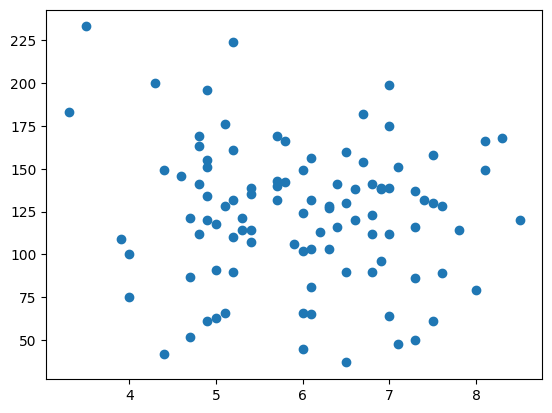

In [19]:
plt.scatter(df['cgpa'],df['iq'])

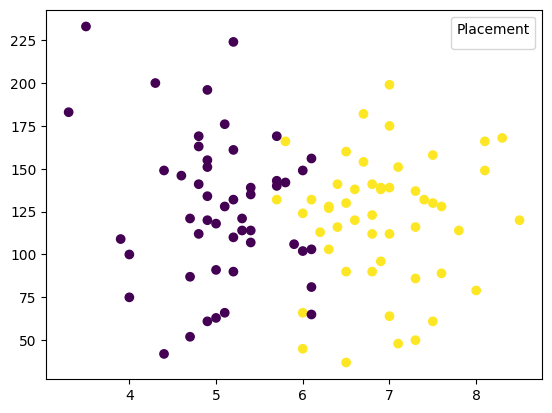

In [24]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.legend(title='Placement')

In [26]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [27]:
x.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [28]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [31]:
x_train

,cgpa,iq
31,3.9,109.0
20,6.6,120.0
42,7.6,89.0
61,7.3,137.0
52,7.0,175.0
...,...,...
46,5.3,114.0
77,7.3,50.0
60,6.9,139.0
37,8.1,149.0


In [32]:
y_train

31    0
20    1
42    1
61    1
52    1
     ..
46    0
77    1
60    1
37    1
76    0
Name: placement, Length: 90, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

In [36]:
x_train = scaler.fit_transform(x_train)

In [37]:
x_train

array([[-1.7852148 , -0.36141619],
       [ 0.56222674, -0.08849321],
       [ 1.43164953, -0.85763979],
       [ 1.17082269,  0.33329685],
       [ 0.90999585,  1.27612169],
       [-0.91579201,  0.68065337],
       [ 1.34470725,  0.85433163],
       [ 1.34470725, -1.55235283],
       [ 0.47528446, -2.14782115],
       [-1.00273429,  1.12725461],
       [-0.48108061, -0.23736029],
       [ 0.04057306, -1.42829693],
       [-0.56802289, -0.06368203],
       [-0.82884973, -0.13811557],
       [-1.00273429,  0.43254157],
       [ 0.47528446, -0.83282861],
       [ 0.21445762, -0.26217147],
       [ 0.47528446,  0.90395399],
       [-0.48108061,  0.38291921],
       [ 1.25776497,  0.20924095],
       [-0.22025377,  0.20924095],
       [-1.00273429, -0.28698265],
       [-0.74190745, -1.42829693],
       [-0.82884973, -1.50273047],
       [-1.3505034 , -2.02376525],
       [-0.13331149,  0.45735275],
       [-0.48108061,  0.28367449],
       [-0.65496517,  0.20924095],
       [-0.74190745,

In [38]:
x_test = scaler.fit_transform(x_test)

In [39]:
x_test

array([[-0.97271608, -0.48702123],
       [-1.28649546,  0.12540068],
       [-0.03137794,  0.12540068],
       [ 0.80536707, -2.20763517],
       [ 0.59618082, -0.80781366],
       [-1.18190233,  1.08777796],
       [-0.24056419,  0.94196322],
       [-0.44975044, -0.51618418],
       [ 0.70077395,  0.44619311],
       [ 2.06048459,  1.2919186 ]])

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf = LogisticRegression()

In [42]:
#Model Training
clf.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred= clf.predict(x_test)

In [44]:
y_test

81    0
86    0
63    1
5     1
66    1
47    0
8     0
1     0
32    1
53    1
Name: placement, dtype: int64

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_pred)

0.9

In [48]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

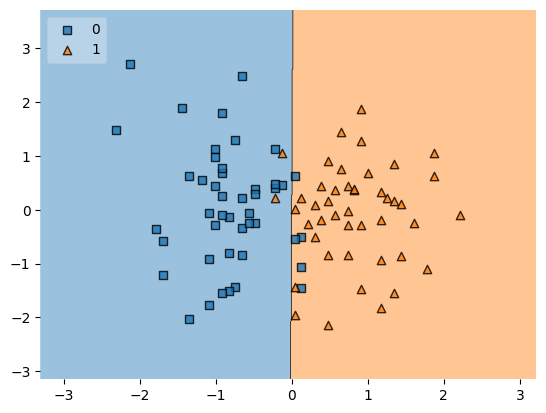

In [51]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)


In [52]:
import pickle

In [53]:
pickle.dump(clf,open('model.pkl','wb'))